In [ ]:
# Import libraries
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [20]:
# Load the dictionary from the pickle file
with open('signs_dict7.pkl', 'rb') as f:
    data = pkl.load(f)

In [ ]:
# Assign the data to the variables
X_train = np.array(data['X_train'])
X_test = np.array(data['X_test'])
y_train = np.array(data['y_train'])
y_test = np.array(data['y_test'])

In [ ]:
# Print the shape of the data
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(3580, 4)
(3580, 361, 327, 3)
(78, 4)
(78, 361, 327, 3)


In [23]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),     # Random rotation (10 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.1),             # Random zoom
    tf.keras.layers.RandomFlip("horizontal"),     # Random horizontal
    tf.keras.layers.RandomFlip("vertical")       # Random vertical
])

In [ ]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(361, 327, 3)),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(4, activation='softmax')  # 4 classes
])

In [ ]:
# Get the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 361, 327, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 359, 325, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 179, 162, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 177, 160, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 88, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 86, 78, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 43, 39, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 41, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 20, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 18, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 9, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,255,876 (20.05 MB)

 Trainable params: 5,255,876 (20.05 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model with data augmentation
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 59s 513ms/step - accuracy: 0.3705 - loss: 1.2783 - val_accuracy: 0.6026 - val_loss: 1.4658
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 516ms/step - accuracy: 0.6598 - loss: 0.8502 - val_accuracy: 0.5769 - val_loss: 2.4456
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 521ms/step - accuracy: 0.7137 - loss: 0.7080 - val_accuracy: 0.6282 - val_loss: 2.8476
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 517ms/step - accuracy: 0.7990 - loss: 0.5387 - val_accuracy: 0.6282 - val_loss: 2.7533
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 515ms/step - accuracy: 0.8087 - loss: 0.4857 - val_accuracy: 0.7051 - val_loss: 2.5174
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 515ms/step - accuracy: 0.8264 - loss: 0.4753 - val_accuracy: 0.6795 - val_loss: 1.8109
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 516ms/step - accuracy: 0.8752 - loss: 0.3312 - val_accuracy: 0.6667 - val_loss: 2.2293
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 58s 514ms/step - accuracy: 0.8807 - loss: 0

In [32]:
# Print classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=['crosswalk', 'speedlimit', 'stop', 'trafficlight']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
              precision    recall  f1-score   support

   crosswalk       0.74      0.93      0.82        15
  speedlimit       0.85      0.79      0.81        28
        stop       1.00      0.75      0.86        20
trafficlight       0.72      0.87      0.79        15

    accuracy                           0.82        78
   macro avg       0.83      0.83      0.82        78
weighted avg       0.84      0.82      0.82        78



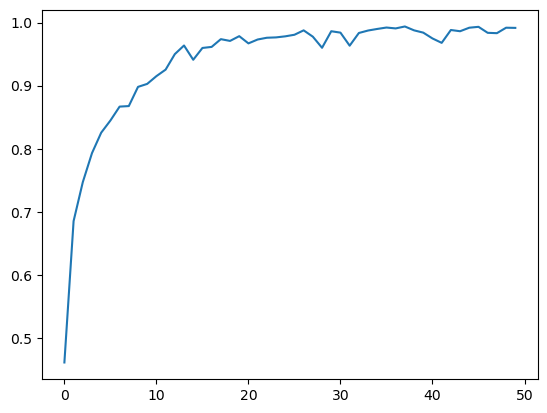

In [33]:
# Plot the history of the model
plt.plot(history.history['accuracy'], label='accuracy')

In [31]:
# Save the model to a file
model.save('traffic_signs_model7.keras')